In [1]:
import pandas as pd
from sklearn import linear_model 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
dummy_var = pd.get_dummies(df.town)
dummy_var

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [4]:
new_df = pd.concat([df,dummy_var], axis = 'columns')
new_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [5]:
final = new_df.drop(['town', 'west windsor'], axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [6]:
x = final[['area', 'monroe township', 'robinsville']].values
y = final.price

In [7]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [8]:
model.score(x,y)

0.9573929037221873

In [9]:
model.predict([[3400, 0, 0]])

array([681241.66845839])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df_le = df
df_le.town = le.fit_transform(df_le.town)
df_le

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [12]:
x = df_le[['town','area']].values
y = df_le.price.values

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [14]:
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [15]:
x = ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [16]:
x = x[ : , 1: ]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [17]:
model.fit(x,y)

LinearRegression()

In [18]:
model.score(x,y)

0.9573929037221873

In [19]:
model.predict([[1, 0, 2800]])

array([590775.63964739])

In [20]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [21]:
df = df.rename(columns ={'Car Model': 'Model', 'Sell Price($)': 'Price', 'Age(yrs)': 'Age' })
df.Model = le.fit_transform(df.Model)
df

,Model,Mileage,Price,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


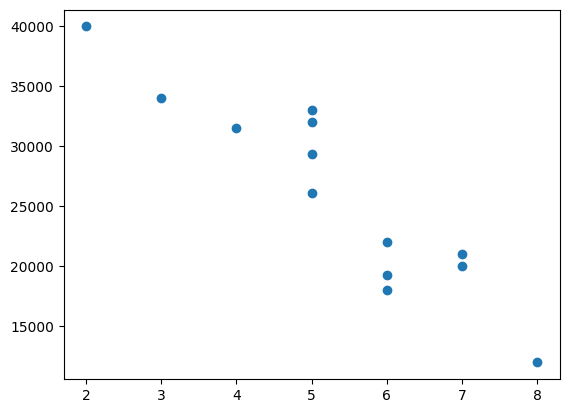

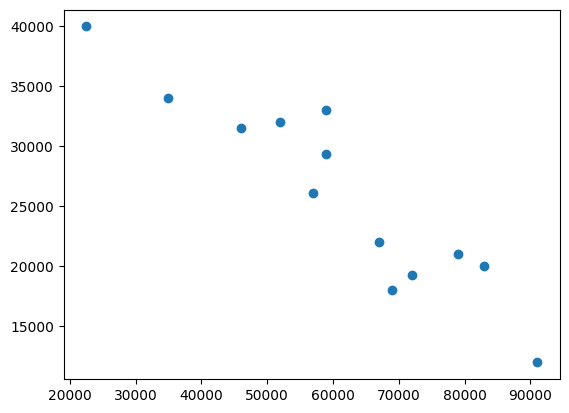

In [22]:
plt.scatter(df['Age'], df['Price'])
plt.show()
plt.scatter(df['Mileage'], df['Price'])
plt.show()

In [23]:
x = df[['Model', 'Mileage', 'Age']].values
y = df.Price

In [24]:
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [25]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

In [26]:
x = ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [27]:
x = x[ : , 1: ]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [28]:
model.fit(x,y)

LinearRegression()

In [29]:
model.score(x,y)

0.9417050937281082

In [30]:
model.predict([[0,1, 45000, 4]])

array([36991.31721062])

In [31]:
y_predicted = model.predict(x)

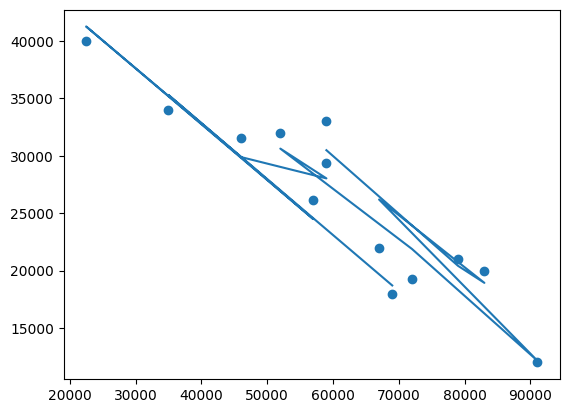

In [32]:
plt.scatter(df.Mileage,df.Price)
plt.plot(df.Mileage, y_predicted)

In [ ]:
plt.scatter(df.Age,df.Price)
